## Indicadores de bienestar en mexico 2014

En esta caprta haremos uso del metodo de las k-medias sobre los indicadores de bienestar en los distintos 
estados de la republica para detectar patrones en la informacion.

In [5]:
import numpy as np
import pandas as pd

doc = 'indicadores_bienestar_2014.csv'

indicador = pd.read_csv(doc, index_col = 0, thousands  = ',')
indicador.index.names = ['Estado']
indicador.columns.names = ['Indicadores']
indicador = indicador[1:]

Seleccionamos nurestros indicadores de bienestar

In [7]:
columnas  = ['Niveles de educación',
           'Deserción escolar',
           'Tasa de homicidios',
           'Tasa de desocupación',
           'Ingreso equivalente disponible de los hogares',
           'Porcentaje de viviendas con techos de materiales resistentes',
           'Confianza en la policía',
           'Acceso a servicios de salud',
           'Tasa de obesidad']
indicador = indicador[columnas]
indicador.head()

Indicadores,Niveles de educación,Deserción escolar,Tasa de homicidios,Tasa de desocupación,Ingreso equivalente disponible de los hogares,Porcentaje de viviendas con techos de materiales resistentes,Confianza en la policía,Acceso a servicios de salud,Tasa de obesidad
Estado,,,,,,,,,
Aguascalientes,42.5,12.1,3.5,4.0,7642.0,94.9,68.6,87.9,31.0
Baja California,44.8,19.3,32.2,2.6,8682.0,49.5,45.6,80.6,39.5
Baja California Sur,48.4,11.7,29.6,4.6,8279.0,74.8,56.9,84.9,43.6
Campeche,40.6,15.0,10.1,3.7,7361.0,52.7,57.2,89.3,43.3
Coahuila de Zaragoza,42.9,19.1,8.5,4.4,8069.0,77.8,60.0,87.2,37.1


In [8]:
indicador.describe()

Indicadores,Niveles de educación,Deserción escolar,Tasa de homicidios,Tasa de desocupación,Ingreso equivalente disponible de los hogares,Porcentaje de viviendas con techos de materiales resistentes,Confianza en la policía,Acceso a servicios de salud,Tasa de obesidad
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,39.875000,13.100000,21.540625,3.721875,6665.406250,70.953125,55.021875,85.387500,34.065625
std,6.587917,4.188001,18.240046,1.135280,1679.871344,16.982116,9.246682,2.951517,5.247218
min,27.700000,2.800000,3.000000,2.000000,3683.000000,29.800000,34.600000,77.200000,25.400000
25%,35.425000,11.100000,11.225000,2.950000,5511.500000,64.100000,50.175000,84.400000,30.300000
50%,40.700000,13.000000,15.250000,3.700000,6601.500000,75.100000,54.750000,85.750000,33.300000
75%,43.100000,15.975000,29.075000,4.425000,7728.500000,82.925000,61.675000,87.275000,37.100000
max,58.800000,19.300000,82.400000,7.400000,10922.000000,94.900000,70.100000,90.900000,44.800000


## PCA

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(indicador)
indicador_pca = pca.transform(indicador)

indicador_pca_df = pd.DataFrame(indicador_pca)
indicador_pca_df.index = indicador.index
indicador_pca_df.columns = ['CP_1', 'CP_2', 'CP_3']

indicador_pca_df.head()

,CP_1,CP_2,CP_3
Estado,,,
Aguascalientes,976.716062,-25.616029,-12.259574
Baja California,2016.459713,25.355013,25.348091
Baja California Sur,1613.621013,9.816340,0.215752
Campeche,695.509365,-0.639188,23.864984
Coahuila de Zaragoza,1403.623687,-11.318982,5.219518


In [24]:
print(pca.explained_variance_ratio_)


[9.99754647e-01 1.29015254e-04 7.19492603e-05]


#### Obtenemos muy buenos componentes principales

Visualizamos los datos

In [26]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook

<IPython.core.display.Javascript object>


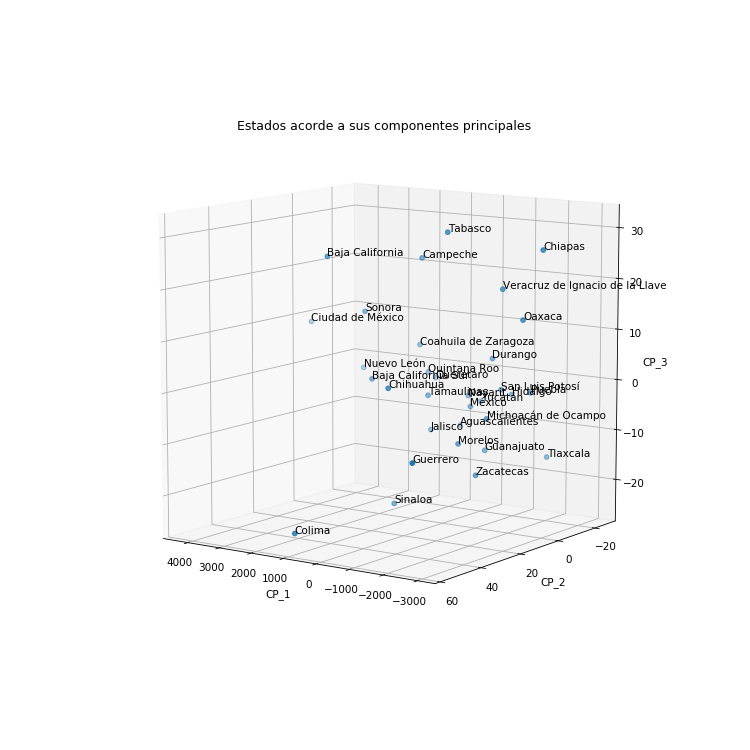

In [38]:
tresd_ax = plt.figure(figsize = (10,10)).gca(projection = '3d')
tresd_ax.scatter(indicador_pca_df['CP_1'],
                indicador_pca_df['CP_2'],
               indicador_pca_df['CP_3'])

tresd_ax.set_xlabel('CP_1')
tresd_ax.set_ylabel('CP_2')
tresd_ax.set_zlabel('CP_3')
tresd_ax.set_title('Estados acorde a sus componentes principales')

for i, estado in enumerate(indicador_pca_df.index):
    tresd_ax.text(indicador_pca_df.iloc[i].CP_1,
                  indicador_pca_df.iloc[i].CP_2,
                  indicador_pca_df.iloc[i].CP_3,
                  estado)

tresd_ax.view_init(10, 125)

## Clustering con K-medias

<IPython.core.display.Javascript object>


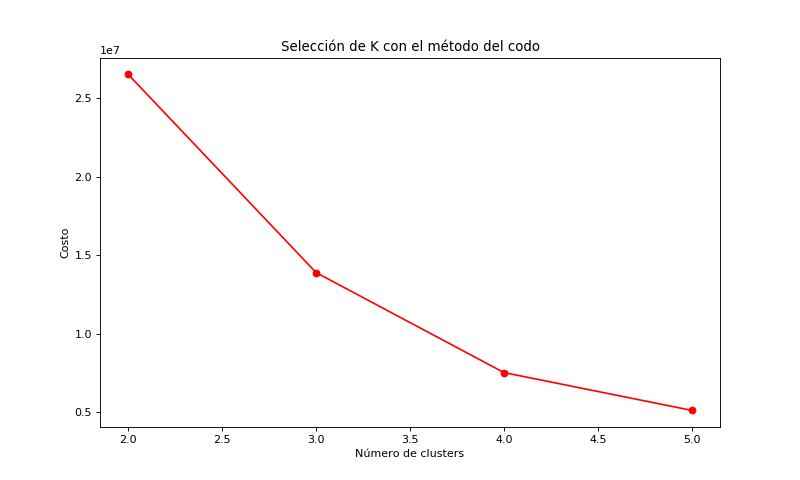

Text(0.5,1,'Selección de K con el método del codo')

In [34]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

maxK = 5
listaK = range(2,maxK + 1)
costos=[]

for k in listaK:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(indicador)
    costos.append(-kmeans.score(indicador))
    
plt.figure(figsize=(10,6))
plt.plot(listaK, costos, '-or')
plt.xlabel('Número de clusters')
plt.ylabel('Costo')
plt.title('Selección de K con el método del codo')

### Mediante el analisis del codo, elegimos usar 3 componentes
y visualizamos como se verian los datos

<IPython.core.display.Javascript object>


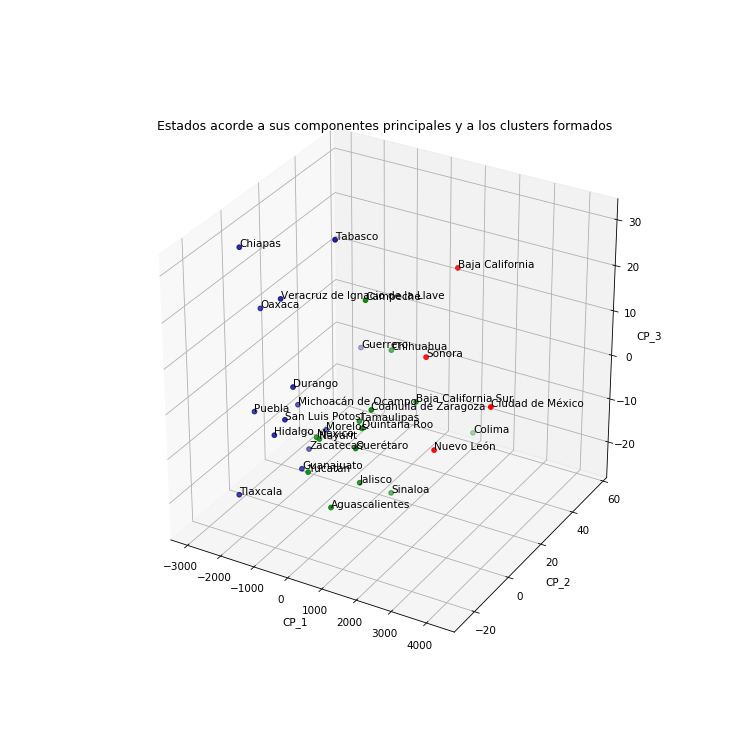

In [40]:
col = ['DarkBlue', 'Red', 'Green']
K = 3
kmeans = KMeans(n_clusters=K)
clusters = kmeans.fit(indicador)
indicador_pca_df['grupos'] = pd.Series(clusters.labels_, 
                                       index = indicador_pca_df.index)

colores = [col[g] for g in indicador_pca_df.grupos]

tresd_ax = plt.figure(figsize = (10,10)).gca(projection = '3d')
tresd_ax.scatter(indicador_pca_df['CP_1'],
                indicador_pca_df['CP_2'],
               indicador_pca_df['CP_3'],
                c = colores)

tresd_ax.set_xlabel('CP_1')
tresd_ax.set_ylabel('CP_2')
tresd_ax.set_zlabel('CP_3')
tresd_ax.set_title('Estados acorde a sus componentes principales y a los clusters formados')

for i, estado in enumerate(indicador_pca_df.index):
    tresd_ax.text(indicador_pca_df.iloc[i].CP_1,
                  indicador_pca_df.iloc[i].CP_2,
                  indicador_pca_df.iloc[i].CP_3,
                  estado)


## Análisis de los prototipos
Después de ver como se agrupan los 32 estados del país, es hora de ver como se comportan los prototipos encontrados por las k-medias.

In [42]:
prototipos = pd.DataFrame(kmeans.cluster_centers_)
prototipos.index = ['P'+str(i + 1) for i in range(K)]
prototipos.columns = indicador.columns
prototipos.index.names = ['Protopipo']
prototipos.columns.names = ['Indicadores']

prototipos

Indicadores,Niveles de educación,Deserción escolar,Tasa de homicidios,Tasa de desocupación,Ingreso equivalente disponible de los hogares,Porcentaje de viviendas con techos de materiales resistentes,Confianza en la policía,Acceso a servicios de salud,Tasa de obesidad
Protopipo,,,,,,,,,
P1,34.492857,13.785714,21.371429,3.378571,5123.000000,62.928571,52.264286,85.200000,31.742857
P2,49.325000,15.975000,19.500000,4.225000,9538.000000,73.800000,51.775000,83.175000,37.275000
P3,42.557143,11.592857,22.292857,3.921429,7387.071429,78.164286,58.707143,86.207143,35.471429


Visualizamos, y podemos observar la dominancia del indicador de ingreso disponible

<IPython.core.display.Javascript object>


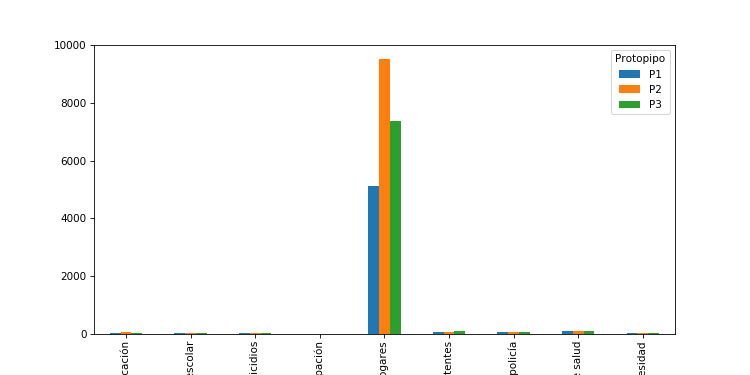

In [49]:
import matplotlib.pyplot as plt
prototipos.T.plot(figsize=(10,5), kind="bar")

## Prototipo por indicador.

<IPython.core.display.Javascript object>


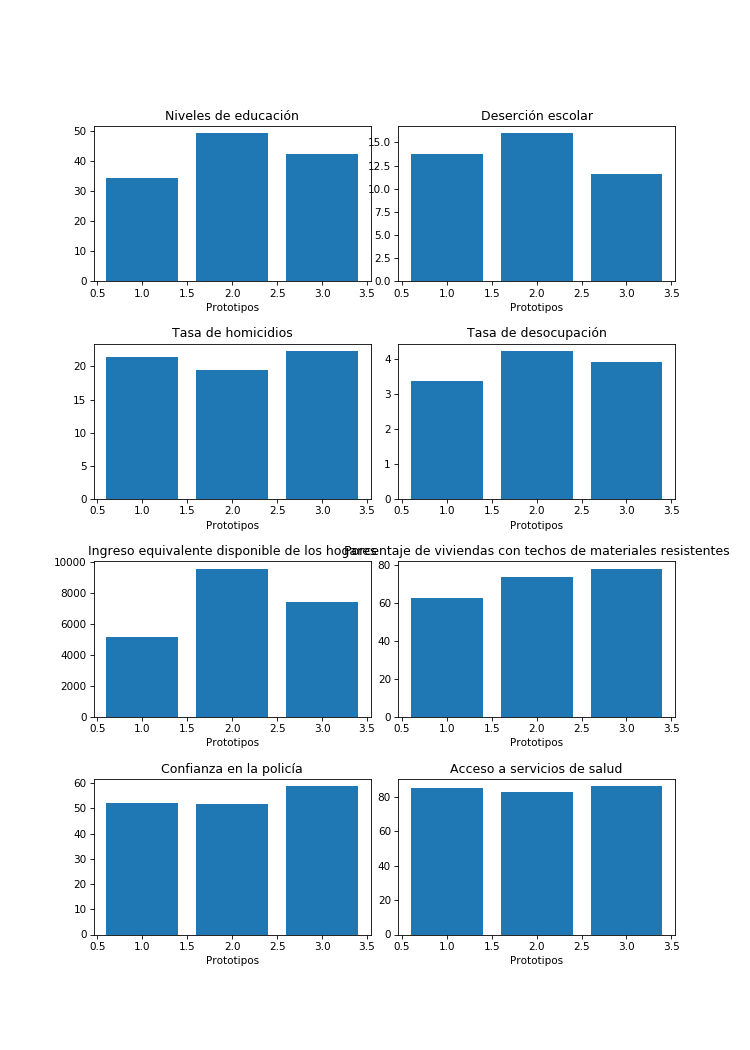

In [55]:
fig, axes = plt.subplots(ncols = 2, nrows = 4, figsize = (10, 14))

ind = [(i, j) for i in range(4) for j in range(2)]

for x, (i, j) in zip(columnas, ind):
    axes[i, j].bar([1, 2, 3], prototipos[x])
    axes[i, j].set(title = x)
    axes[i, j].set(xlabel = 'Prototipos')

fig.subplots_adjust(wspace = 0.1, hspace = 0.4)

## Conclusión
Aunque llegue a pensar que entre mas pobreza, mayor seria la delincuencia parece ser que llega un punto en que eres tan pobre que no tienes que te roben. O la gente pobre se queja menos.